<div class="sc-ePpfBx hvYpEH sc-cHFVyg dtGMOi"><h3>Context</h3>
<p><strong>Problem Statement</strong></p>
<p>Customer Personality Analysis is a detailed analysis of a company’s ideal customers. It helps a business to better understand its customers and makes it easier for them to modify products according to the specific needs, behaviors and concerns of different types of customers. </p>
<p>Customer personality analysis helps a business to modify its product based on its target customers from different types of customer segments. For example, instead of spending money to market a new product to every customer in the company’s database, a company can analyze which customer segment is most likely to buy the product and then market the product only on that particular segment.</p>
<h3>Content</h3>
<p><strong>Attributes</strong></p>
<p><strong>People</strong></p>
<ul>
<li>ID: Customer's unique identifier</li>
<li>Year_Birth: Customer's birth year</li>
<li>Education: Customer's education level</li>
<li>Marital_Status: Customer's marital status</li>
<li>Income: Customer's yearly household income</li>
<li>Kidhome: Number of children in customer's household</li>
<li>Teenhome: Number of teenagers in customer's household</li>
<li>Dt_Customer: Date of customer's enrollment with the company</li>
<li>Recency: Number of days since customer's last purchase</li>
<li>Complain: 1 if the customer complained in the last 2 years, 0 otherwise</li>
</ul>
<p><strong>Products</strong></p>
<ul>
<li>MntWines: Amount spent on wine in last 2 years</li>
<li>MntFruits: Amount spent on fruits in last 2 years</li>
<li>MntMeatProducts: Amount spent on meat in last 2 years</li>
<li>MntFishProducts: Amount spent on fish in last 2 years</li>
<li>MntSweetProducts: Amount spent on sweets in last 2 years</li>
<li>MntGoldProds: Amount spent on gold in last 2 years</li>
</ul>
<p><strong>Promotion</strong></p>
<ul>
<li>NumDealsPurchases: Number of purchases made with a discount</li>
<li>AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise</li>
<li>AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise</li>
<li>AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise</li>
<li>AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise</li>
<li>AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise</li>
<li>Response: 1 if customer accepted the offer in the last campaign, 0 otherwise</li>
</ul>
<p><strong>Place</strong></p>
<ul>
<li>NumWebPurchases: Number of purchases made through the company’s website</li>
<li>NumCatalogPurchases: Number of purchases made using a catalogue</li>
<li>NumStorePurchases: Number of purchases made directly in stores</li>
<li>NumWebVisitsMonth: Number of visits to company’s website in the last month</li>
</ul>


# Melakukan import requirement yang diperlukan :

1. Import pandas, Numpy, matplotlib, seaborn
2. Setelah itu upload data csv, disini menggunakan github untuk memudahkan dalam mengakses data pada file marketing_campaign.csv
3. Setelah itu jalankan display untuk melihat data-data didalam file csv tersebut

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from matplotlib.colors import ListedColormap
from sklearn.metrics import confusion_matrix
from sklearn import metrics
import warnings
import sys
if not  sys.warnoptions:
    warnings.simplefilter("ignore")
import warnings
warnings.filterwarnings("ignore")


## Membaca dataset pada file marketing personality analisis csv
1. Mengimport data menggunakan git hub untuk menampilkan dataset

In [47]:
# URL DATASET
url = "https://raw.githubusercontent.com/latief13mm/data-customer-personality/refs/heads/main/marketing_campaign.csv"

# Baca dataset dari URL
df_marketing = pd.read_csv(url, sep="\t")

df_marketing.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [48]:
# Melihat jumlah baris dan kolo
df_marketing.shape

(2240, 29)

In [49]:
# Mengecek apakah ada dataset yang duplicate
df_marketing.duplicated().sum()

0

In [50]:
# Melihat diskipsi dataset
df_marketing.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [51]:
# Melihat informasi dataset
df_marketing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

# Melakukan Pembersihan(cleaning) Data

In [52]:
# Mengecek apakah pada dataset ada datang hilang atau kosong
df_marketing.isnull().sum()

,0
ID,0
Year_Birth,0
Education,0
Marital_Status,0
Income,24
Kidhome,0
Teenhome,0
Dt_Customer,0
Recency,0
MntWines,0


In [53]:
# Menghapus kolom yang tidak diperlukan
# disini saya mengambil kolom ID, Z_CostContact, Z_Revenue karena jika dilihat dari diskripsi dataset nilainya tidak berpengaru dan cenderung sama
df_marketing.drop(['ID', 'Z_CostContact', 'Z_Revenue'], axis=1, inplace=True)

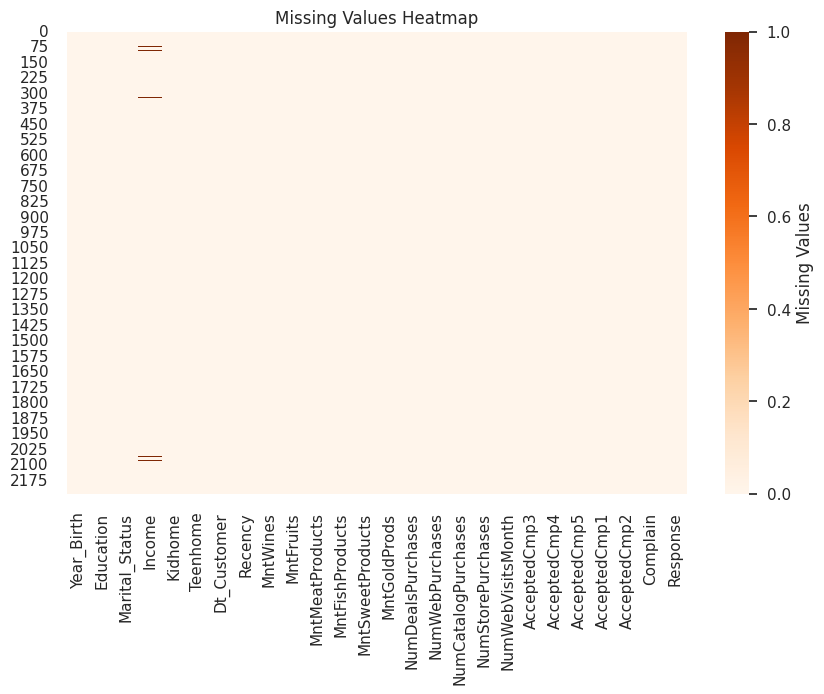

In [54]:
# visualisasi data yang hilang atau kosong
plt.figure(figsize=(10, 6))
sns.heatmap(df_marketing.isnull(), cbar_kws={'label': 'Missing Values'}, cmap='Oranges')
plt.title('Missing Values Heatmap')
plt.show()

Kesimpulan :
* Ada 24 nilai yang hilang pada kolom income



In [55]:
# Untuk nilai yang hllang atau null bisa kita hapus
df_marketing.dropna(inplace=True)

print(f"Missing value in data: {df_marketing.isnull().sum().sum()}")

Missing value in data: 0


Pengamatan dataset:
* Tidak ada nilai yang hilang atau null dari data
* Tidak ada duplikasi data
* Sebagian besar kolom harus numerik




# Melakukan Explorasi Data

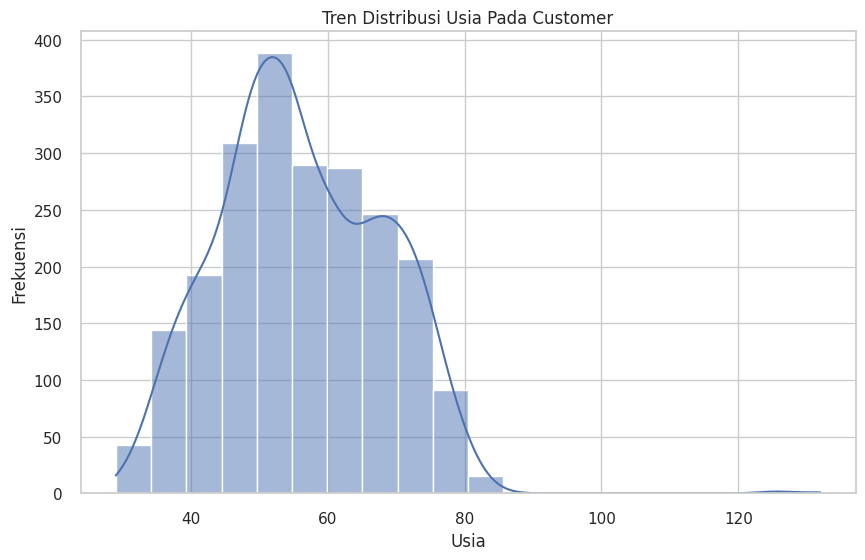

In [56]:
current_year = 2025  # Ganti dengan tahun saat ini
df_marketing['Age'] = current_year - df_marketing['Year_Birth']
plt.figure(figsize=(10, 6))
sns.histplot(df_marketing['Age'], bins=20, kde=True)
plt.title('Tren Distribusi Usia Pada Customer')
plt.xlabel('Usia')
plt.ylabel('Frekuensi')
plt.show()


Pengamatan :
Jika kita ambil dari grafik diatas menunjukkan tren yang cenderung naik pada usia kisaran 45-55 akan tetapi pada usia lanjut atau diatas 70 tren nya cendurung menurun

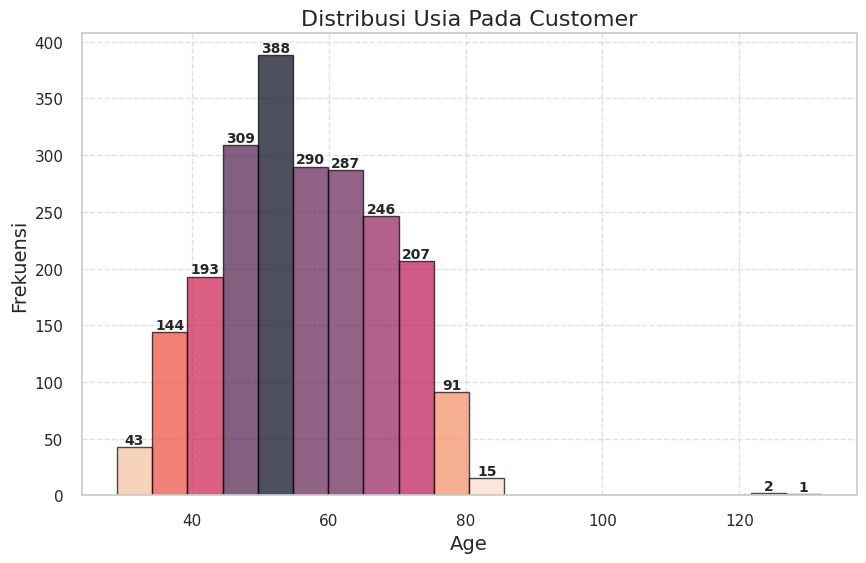

In [57]:
current_year = 2025  # Ganti dengan tahun saat ini
df_marketing['Age'] = current_year - df_marketing['Year_Birth']
plt.figure(figsize=(10, 6))

#Normalisasi data untuk melihat tinggi nilai
n, bins, patches = plt.hist(df_marketing['Age'], bins=20, color='blue', alpha=0.7, edgecolor='black')
for i in range(len(patches)):
    patches[i].set_facecolor(sns.color_palette("rocket_r", as_cmap=True)(n[i] / max(n)))
    if n[i] > 0:
      plt.text(patches[i].get_x() + patches[i].get_width() / 2, n[i], int(n[i]),
               ha='center', va='bottom', fontsize=10, fontweight='bold')



plt.title('Distribusi Usia Pada Customer', fontsize=16)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Frekuensi', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

## Rincian dari grafik Umur (Age)
1. 30-40: 193 customer yang mempresentasikan usia muda yang memiliki potensi jangka panjang
2. 40-50: 309 customer yang menuju usia lanjut
2. 50-60: 388 customer yang menunjukan demografi inti terbesar yang memiliki usia paruh baya
3. 70-80: 290 customer yang mempresentasikan menuju lanjut usia
4. 80-90: 91 customer yang usianya masih terlibat dalam di rentang lanjut usia
5. 90+: 18 customer segment yang sangat kecil untuk customer yang sangat tua

**Pengamatan:**

**Demografi (50-60):** pada usia memiliki tingkat customer terbesar pada dataset, menunjukan bahwa product yang disajikan lebih menarik bagi individu di kisaran usia ini.

**Tren pada usia :** menunjukkan tren yang cenderung naik pada usia kisaran 45-55 akan tetapi pada usia lanjut atau diatas 70 tren nya cendurung menurun.

**Potensi pertumbuhan :** Kisaran usia muda 30-40 berpotensi menuju kenaikan karena mungkin memiliki kebutuhan atau preferensi bagi usia tersebut dan jika diberikan hal yang menarik mungkin akan berdampak jangka panjang

**Rentang lanjut usia :** Meski jumlahnya sedikit tapi masih bisa berpontesi mendapatkan keuntungan dan mungkin dapat diberikan penawaran yang menarik pada usia tersebut.

**Outlier :** masih ada sedikit customer yang masih menggunakan product di usia 90 tahun






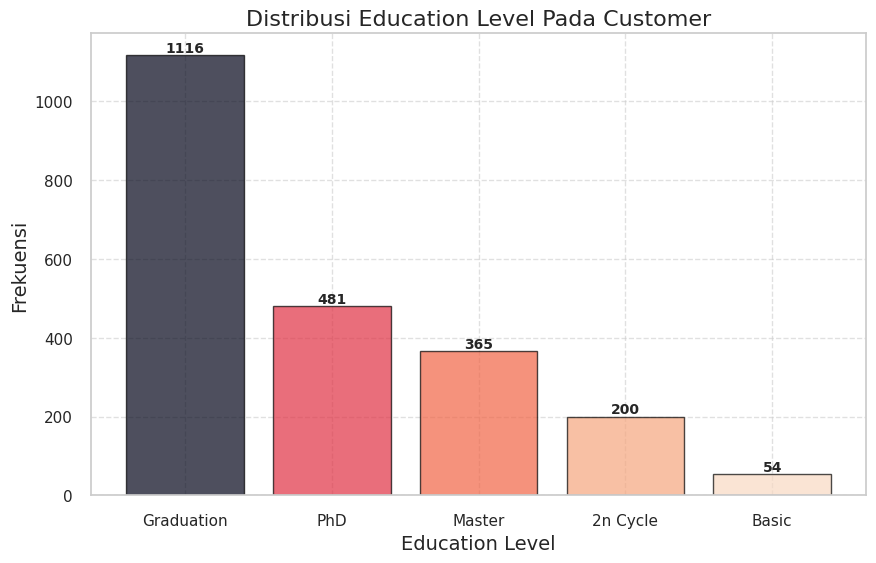

In [58]:
plt.figure  (figsize=(10, 6))

#hintung occurrences level education
education_counts = df_marketing['Education'].value_counts()

#Normalisasi berdasarkan warna pada tinggi bar
bars = plt.bar(education_counts.index, education_counts.values, color='blue', alpha=0.7, edgecolor='black')
for i, bar in enumerate(bars):
  bar.set_facecolor(sns.color_palette("rocket_r", as_cmap=True)(education_counts.values[i] / max(education_counts.values)))
  plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), int(bar.get_height()),
           ha='center', va='bottom', fontsize=10, fontweight='bold')


plt.title('Distribusi Education Level Pada Customer', fontsize=16)
plt.xlabel('Education Level', fontsize=14)
plt.ylabel('Frekuensi', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.6) # Rotate x-axis labels for better readability
plt.show()

## Rincian tingkat pendidikan (education) pada customer

**1. Graduation :** 1116 Customer yang memeliki tingkat paling tinggi diantara pendidikan yang lainnya

**2. PhD :** 481 Customer yang memiliki segmen signifikan dengan kualitas akdemis tingkat lanjut

**3. Master :** 365 Customer memiliki pendidikan tingkat pascasarjana

**4. 2n Cycle :** 200 Customer yang memiliki pendidikan tinggi namun mungkin tidak menyelesaikan gelarnya

**5. Basic : 54** Customer yang memiliki tingkat pendidikan dasar

**Insight:**

**Tingkat Pendidikan :** Sebagian besar customer memiliki tingkat pendidikan yang lebih tinggi di level graduation, dengan indikasi ini menunjukkan basis pelanggannya yang memiliki pendidikan tinggi.

**Level Bawah :** Jika dilihat dari grafik pelanggan yang memiliki tingkat pendidikan dasar sangat kecil, hal ini menunjukkan bahwa pasar masih didominasi oleh grup demografi berpendidikan tinggi.

**Potensial Target :** Stategi yang harus disesuaikan untuk menarik pelanggan dengan latar belakang pendidikan tinggi karena mayoritas pelanggan pada dataset tersebut.

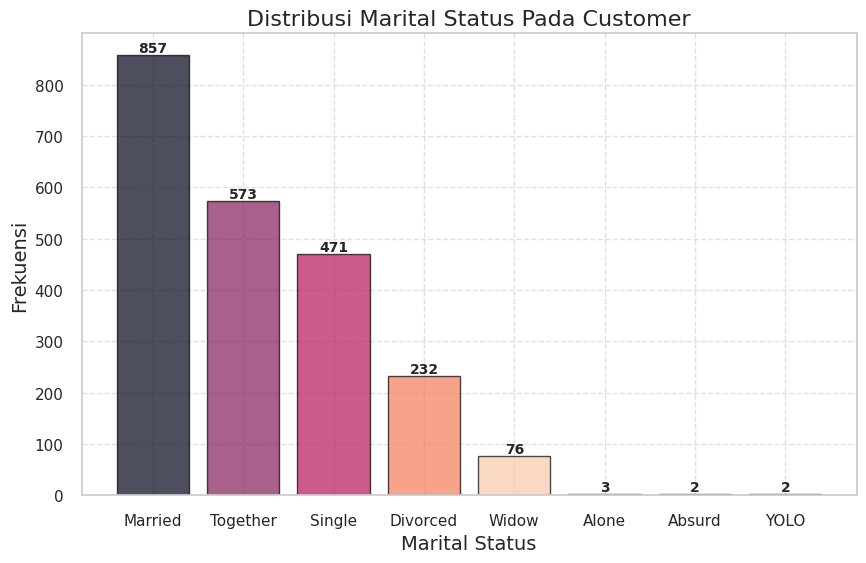

In [59]:
#Buat gambar plot untuk Marital_status (Status Pernikahan)
plt.figure(figsize=(10, 6))

#Distribusi status pernikahan
marital_counts = df_marketing['Marital_Status'].value_counts()
bars_marital = plt.bar(marital_counts.index, marital_counts.values, color='blue', alpha=0.7, edgecolor='black')

#Menerapkan pallete warna untuk status pernikahan
for i, bar in enumerate(bars_marital):
  bar.set_facecolor(sns.color_palette("rocket_r", as_cmap=True)(marital_counts.values[i] / max(marital_counts.values)))
  plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), int(bar.get_height()),
           ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.title('Distribusi Marital Status Pada Customer', fontsize=16)
plt.xlabel('Marital Status', fontsize=14)
plt.ylabel('Frekuensi', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

## Rincian Dari Status Pernikahan Pada Customer

**1. Married :** 857 Customer mempresentasikan grup terbesar pada indikasi basis subtansial yaitu individual yang sudah menikah.

**2. Together :** 573 Customer secara signifikn segment ini menandakan mempunyai pasangan.

**3. Single :** 471 Customer yang menandakan single atau belum menikah.

**4. Divorced :** 232 Customer yang menunjukkan  adanya jumlah perceraian pada dataset

**5. Widow :** 76 Customer grup nya kecil tapi masih relevant

**6. Alone :** 3 Customer segment yang sangat kecil sekali

**7. Absurd dan YOLO :** 2 customer yang lain, kemungkinan dapat dijadikan data yang unik atau tidak dijadikan standarisasi


**Insight :**

**Married dan Together :** 2 kategori yang menjadi mayoritas, bisa dijadikan indikasi untuk preferensi product bagi perusahaan untuk menjangkau individu ini

**Single dan Divorced :** Meskipun nilainya kecil tapi data ini masih bisa dijadikan segmentasi pasar juga

**Outliers :** Kategori seperti Absurd dan YOLO bisa saja dibutuhkan untuk preview data atau validasi data





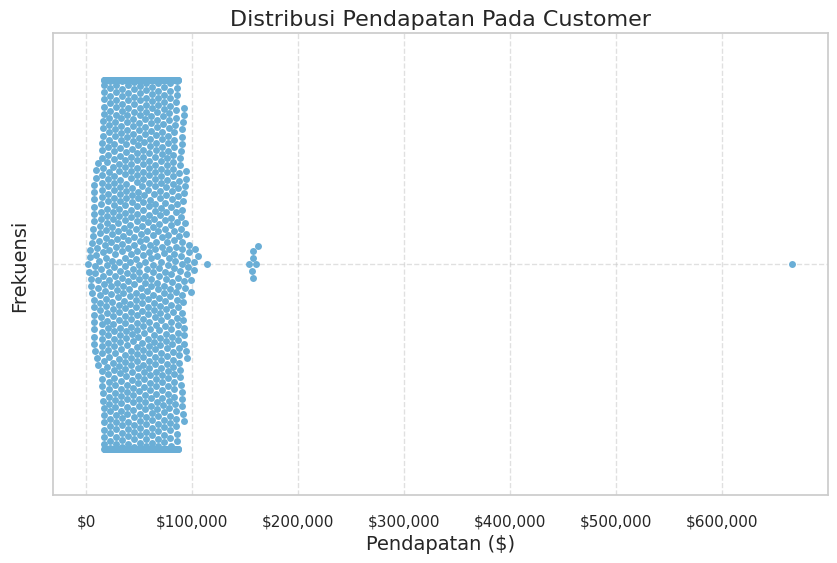

In [60]:
# Membuat gambaran plot kumpulan pendapatan
plt.figure(figsize=(10, 6))

# Distribusi pendapatan
sns.swarmplot(x=df_marketing['Income'], color=sns.color_palette("Blues", 1)[0])

# Menambahkan judul dan label
plt.title('Distribusi Pendapatan Pada Customer', fontsize=16)
plt.xlabel('Pendapatan ($)', fontsize=14)  # Menambahkan simbol dolar
plt.ylabel('Frekuensi', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.6)

# Menambahkan tanda dolar pada sumbu X
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x):,}'))

plt.show()

## Ringkasan Distribusi Pendapat Pada Customer
Pada data ini saya mengkonversikannya menjadi dollar agar mudah dipahami

**0-100K :** Mayoritas customer merepresentasikan pendapatan berkumpul pada value ini

**100K-200K :** Segmentasi pendapatan ini sedikit.

**200K++ :** Hanya ada satu customer yang memiliki pendapatan di atas $200K yaitu $600K

**Insight :**

**Inti Kelompok :** Customer yang memiliki pendapatan dibawah 100K adalah yang terbanyak pada demographi ini

**Potensi Penghasilan Lebih Tinggi :** Sangat sedikit yang merepresentasikan customer yang memiliki pendapatan yang tinggi

**Outlier :** Pendapatan yang tinggi dapat dijadikan insigth yang unik pada dataset


In [61]:
#kalkulasikan jumlah dan indeks untuk mencari nilai kidhome dan teenhome
kidhome_counts = df_marketing['Kidhome'].value_counts().sort_index()
teenhome_counts = df_marketing['Teenhome'].value_counts().sort_index()

all_indices = sorted(set(kidhome_counts.index).union(set(teenhome_counts.index)))
kidhome_counts = kidhome_counts.reindex(all_indices, fill_value=0)
teenhome_counts = teenhome_counts.reindex(all_indices, fill_value=0)

#Membuat penanda untuk kidhome dan teenhome dengan warna
trace_kidhome = go.Bar(
    x=all_indices,
    y=kidhome_counts.values,
    name='Kidhome',
    marker=dict(color='blue')  # Using color #FA812F for Kidhome
)
trace_teenhome = go.Bar(
    x=all_indices,
    y=teenhome_counts.values,
    name='Teenhome',
    marker=dict(color='green')  # Using color #FA4032 for Teenhome
)


# trace_kidhome = go.Bar(x=all_indices.index, y=kidhome_counts.values, name='Kidhome', marker=dict(color='blue'))
# trace_teenhome = go.Bar(x=all_indices.index, y=teenhome_counts.values, name='Teenhome', marker=dict(color='green'))

#membuat gambar
fig = go.Figure(data=[trace_kidhome, trace_teenhome])

#menambahkan judul dan label
fig.update_layout(title='Perbandingan Distibusi Antara Kidhome dengan Teenhome',
                  xaxis_title='Jumlah Anak/Remaja di Rumah',
                  yaxis_title='Frekuensi',
                  barmode='group',
                  bargap=0.2,
                  bargroupgap=0.1)

#menampilkan gambar
fig.show()




**Insight :**

**1. Value 0 :** jumlah anak kecil bisa dan remaja yang ada dirumah lebih banyak artiannya banyak orang tua yang tidak memiliki keduanya

**2. Value 1 :** jumlah orang tua yang memiliki anak remaja yang ada dirumah lebih banyak daripada anak kecil

**3. Value 2 :** jumlah orang tua yang memiliki remaja dirumah lebih sedikit daripada anak kecil

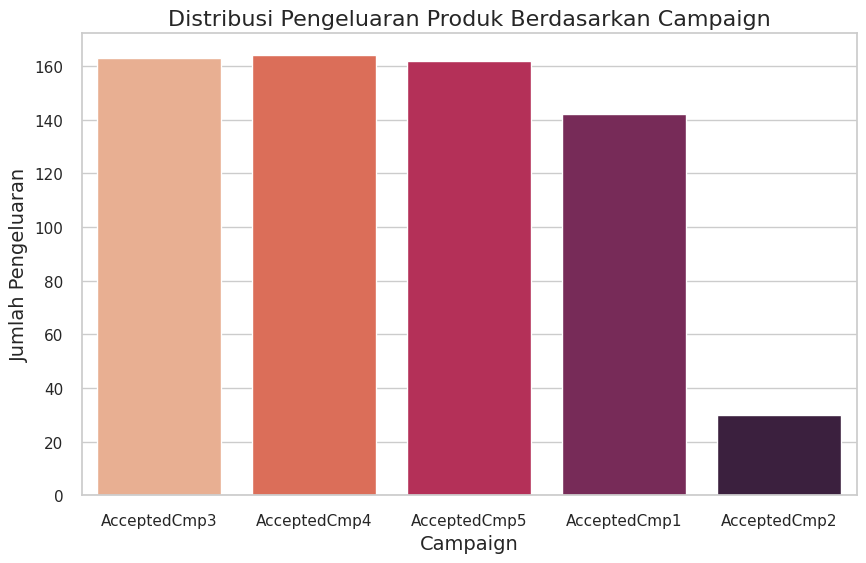

In [62]:
product_columns = ['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1','AcceptedCmp2']
#Jumlahkan setiap product category

total_spend = df_marketing[product_columns].sum()

#Buat plot warna dan ukuran
colors = sns.color_palette("rocket_r", len(product_columns))
plt.figure(figsize=(10, 6))

#Buat diagram bar untuk distribusi pengeluaran
sns.barplot(x=product_columns, y=total_spend.values, palette=colors)

#Judul dan label
plt.title('Distribusi Pengeluaran Produk Berdasarkan Campaign', fontsize=16)
plt.xlabel('Campaign', fontsize=14)
plt.ylabel('Jumlah Pengeluaran', fontsize=14)

plt.show()


## Distribusi Pengeluaran Berdasarkan Campaign
pada graphic bar menggambarkan distribusi pengeluaran dari berbagai kategori campaign yang diterima

**Rincian Pengeluaran**

1. Pada campaingn AcceptedCmp3,AcceptedCmp4, AcceptedCmp5 memiliki tinggi pengeluaran yang hampir sama, indikasinya sama-sama kuat pada penerimaan dan permintaan

2. Pada AcceptedCmp1 sedikit lebih rendah tetapi pengeluarannya masih signifikan

3. Pada AcceptedCmp2 nilai terendah dibanding ke 4 kategori lainnya


**Pengamatan**

**Top Kategori :** Kategori pengeluaran tertinggi ada pada AcceptedCmp3,AcceptedCmp4, AcceptedCmp5 dalam hal ini menunjukkan campaign tersebut yang paling berhasil

**Lower Katergori :** AcceptedCmp2 mempunyai total pengeluaran paling rendah, bisa jadi daya tarik atau efektivitas campaign tersebut masih kurang







In [63]:
product_columns = ['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumDealsPurchases', 'NumWebVisitsMonth']
#Jumlahkan setiap product category

total_spend = df_marketing[product_columns].sum()

#Buat data frame untuk plot
data = {
    'Product Category': product_columns,
    'Total Purchases': total_spend
}

#Membuat bagan seperti lingkaran untuk label
fig = px.pie(data, names='Product Category',
             values='Total Purchases',
             title='Distribusi Pembelian dan Kunjungan di Seluruh Kategori',
             color_discrete_sequence=px.colors.sequential.Greens)

#Penyesuaian bagan lingkaran dan atur label
fig.update_traces(hole=0.4, textinfo='percent', textposition='outside', textfont_size=14)
fig.update_layout(title_font_size=16)

#Menampilkan bagan
fig.show()



## Distribusi Pembelian Dan Kunjungan Pada Semua Kategori Produk
Pada lingkaran chart ini menampilkan berbagai macam pembelian dan tipe kunjungan, yang dapat memberikan suatu insight dari kebiasaan customer yang berbeda pada setiap bagiannya.

**Rincian Kategori :**

**NumStorePurchases :** 28,7% menunjukkan persentase pembelian yang dilakukan langsung ke toko.

**NumWebVisitsMonth :** 26,3% menunjukkan persentase kunjungan situs web perbulannya masih tinggi dan bisa jadi insight yang kuat.

**NumWebPurchases :** 20,2% menunjukkan persentase pembelian yang dilakukan di situs website, sedikit lebih rendah dari kunjungan website.

**NumCatalogPurchases :** 13,2% menunjukkan persentase pembelian melalui catalog.

**NumDealsPurchases :** 11,5% menunjukkan persentase selama masa promosi, porsinya cukup kecil dibanding yang lainnya, kemungkinan ada hal yang berpengaruh pada nilai diskon yang dapat diambil oleh customer

**Pengamatan :**

**Belanja Ke Toko Dominan :** pembelian langsung ke toko fisik memilki persentase tertinggi, hal ini menunjukan adanya preferensi terhadap belanja di toko dikalangan customer.

Kunjungan Websiten VS Belanja Online : tingkat kunjungan ke website lebih tinggi dibandingkan dengan belanja di website, hal ini menunjukan adanya kesenjangan.

Penawaran : porsi yang paling keci diantara yang lain, ada kemungkinan pelanggan kurang tertarik terhadap produk yang ditawarkan kepada customer bisa dalam hal promo, diskon atau event dan sebagainya

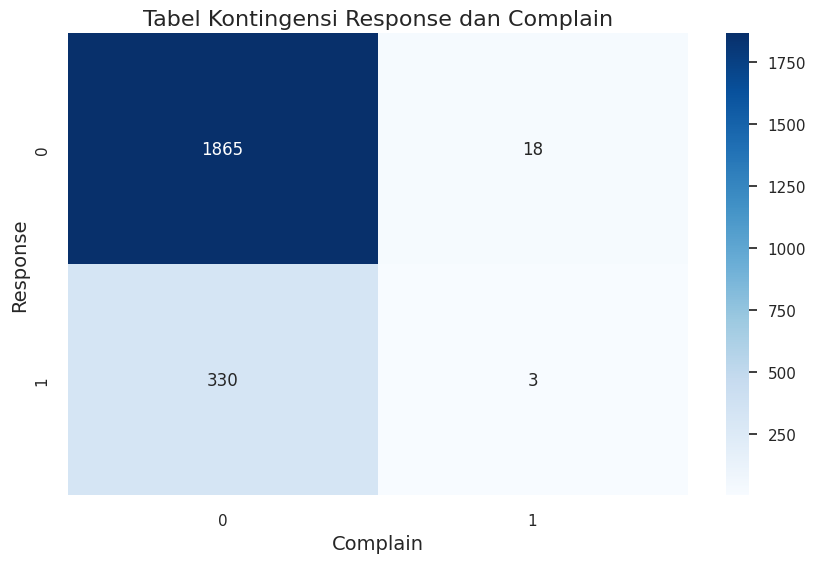

In [64]:
#Membuat tabel kontingen
contingency_table = pd.crosstab(df_marketing['Response'], df_marketing['Complain'])

plt.figure(figsize=(10, 6))

#Membuat diagram heatmap
sns.heatmap(contingency_table, annot=True, fmt='d', cmap='Blues', cbar=True)
plt.title('Tabel Kontingensi Response dan Complain', fontsize=16)
plt.xlabel('Complain', fontsize=14)
plt.ylabel('Response', fontsize=14)
plt.show()

## Heatmap Response VS Complain
Heatmap ini menggambarkan interaksi antara keluhan pelanggan dan response yang diterima


**Rincian :**

**Response 0, Complain 0 :** 1865 Sebagian besar pengguna tidak mengeluh dan tidak mendapat tanggapan

**Response 0, Complain 1 :** 18 Sejumlah kecil mengeluh tapi tidak mendapat tanggapan

**Response 1, Complain 0 :** 330 Banyak pengguna menerima respons tanpa mengajukan keluhan

**Response 1, Complain 1 :** 3 Sangat sedikit pengguna yang mengeluh dan menerima tanggapan


**Pengamatan**

**Mayoritas Tidak Complain :** Sebagian besar pengguna tidak memberikan keluhan dan tidak ada response yang mungkin menunjukan kepuasan

**Response yang prokatif :** Sejumlah pengguna menerima respons tanpa keluhan, yang mungkin menyoroti layanan pelanggan yang proaktif

**Response dan Complaint yang jarang :** Complain sangan minim dan bahkan lebih sedikit yang menghasilkan tanggapan, yang dapat menunjukkan ketidakpuasan yang rendah atau tanggapan yang diberikan terbatas

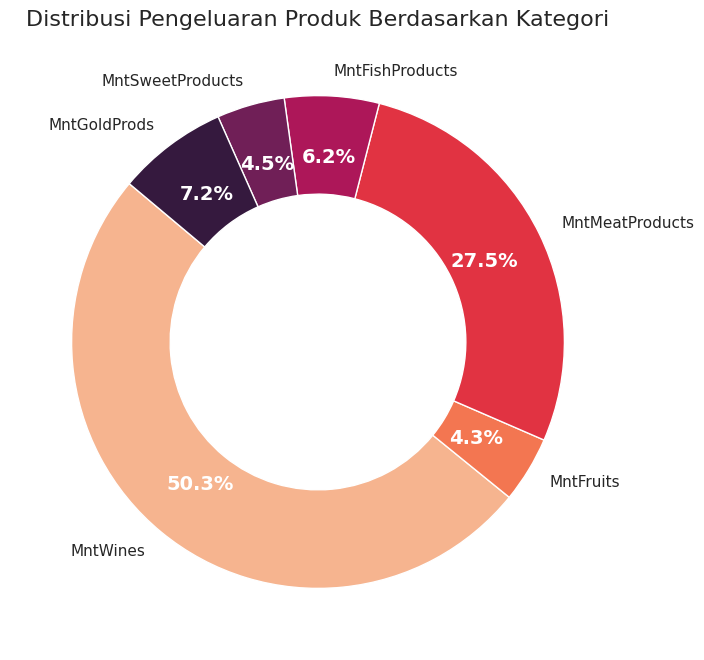

In [65]:
product_columns = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
total_spend = df_marketing[product_columns].sum()

colors = sns.color_palette("rocket_r", len(product_columns))
plt.figure(figsize=(8, 8))
wedges, texts, autotexts = plt.pie(total_spend, labels=product_columns, autopct='%1.1f%%', startangle=140, colors=colors, wedgeprops=dict(width=0.4), pctdistance=0.75)
for autotext in autotexts:
  autotext.set_color('white')
  autotext.set_fontsize(14)
  autotext.set_fontweight('bold')

#add title
plt.title('Distribusi Pengeluaran Produk Berdasarkan Kategori', fontsize=16)

plt.show()

## Rincian Pengeluaran Berdasarkan Product

1. Wines : 50,3% menunjukkan pembelian anggur mendominasi pengeluaran dan minat dari kategori product ini sangat tinggi

2. Meat : 27,5% menunjukkan representasi pengeluaran dari product daging juga sangat populer

3. Gold : 7,2% menunjukkan pengeluaran besar pada product premium atau mewah

4. Fish : 6,2% Lebih kecil untuk segmentasi product ikan

5. Sweet : 4,5% Menunjukkan masih ada minat terhadap product manis, namun masih kurang jumlah nya

6. Fruit : 4,3% Dibandingkan semua kategori produk yang lain, fruit menjadi kategori paling rendah


**Pengamatan**

Tingkat pengeluaran tertinggi (wine) : Produk wine menjadi product dengan katergori paling tinggi dalam total pengeluaran, yang menunjukkan preferensi atau permintaan terhadap kategori product ini di kalangan pelanggan

Tingkat pengeluaran terendah (Fruit, Sweet) : Menjadi product dengan porsi terendah yang mungkin mengindikasikan rendahnya permintaan barang-barang ini

Potensi produk yang dapat tumbuh (Meat) : Secara signifikan pengeluaran dari produk ini dapat bertumbuh dengan diberikan promosi atau kampanye agar lebih efektif

Nilai product yang tinggi (Gold) : Menjadi pangsa pasar yang wajar karena minat pelanggan akan barang premium dan high class

# Hapus Outlier Yang Tidak Di Perlukan

In [66]:
#Hitung jumlah hari setiap pelanggan yang telah menjadi pelanggan perusahaan
df_marketing['Dt_Customer'] = pd.to_datetime(df_marketing.Dt_Customer, format='%d-%m-%Y')
latest_date = df_marketing['Dt_Customer'].max()
df_marketing['Days_of_client'] = (latest_date - df_marketing['Dt_Customer']).dt.days

df_marketing.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Days_of_client
0,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,...,7,0,0,0,0,0,0,1,68,663
1,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,...,5,0,0,0,0,0,0,0,71,113
2,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,...,4,0,0,0,0,0,0,0,60,312
3,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,...,6,0,0,0,0,0,0,0,41,139
4,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,...,5,0,0,0,0,0,0,0,44,161


In [67]:
#Mengganti 'PhD', '2n Cycle', 'Graduation', dan 'Master' dengan 'PG' di kolom 'Education'
df_marketing['Education'] = df_marketing['Education'].replace(['PhD', '2n Cycle', 'Graduation', 'Master'], 'PG')

#Mengganti 'Basic' dengan 'UG' di kolom 'Education'
df_marketing['Education'] = df_marketing['Education'].replace(['Basic'], 'UG')

df_marketing.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Days_of_client
0,1957,PG,Single,58138.0,0,0,2012-09-04,58,635,88,...,7,0,0,0,0,0,0,1,68,663
1,1954,PG,Single,46344.0,1,1,2014-03-08,38,11,1,...,5,0,0,0,0,0,0,0,71,113
2,1965,PG,Together,71613.0,0,0,2013-08-21,26,426,49,...,4,0,0,0,0,0,0,0,60,312
3,1984,PG,Together,26646.0,1,0,2014-02-10,26,11,4,...,6,0,0,0,0,0,0,0,41,139
4,1981,PG,Married,58293.0,1,0,2014-01-19,94,173,43,...,5,0,0,0,0,0,0,0,44,161


In [68]:
# Mengelompokkan 'Married', 'Together' sebagai "Relationship"
df_marketing['Marital_Status'] = df_marketing['Marital_Status'].replace(['Married', 'Together'], 'Relationship')

# Grouping the 'Divorced', 'Widow', 'Alone', 'YOLO', 'Absurd', as Single
df_marketing['Marital_Status'] = df_marketing['Marital_Status'].replace(['Divorced', 'Widow', 'Alone', 'YOLO', 'Absurd'], 'Single')

df_marketing.head()


,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Days_of_client
0,1957,PG,Single,58138.0,0,0,2012-09-04,58,635,88,...,7,0,0,0,0,0,0,1,68,663
1,1954,PG,Single,46344.0,1,1,2014-03-08,38,11,1,...,5,0,0,0,0,0,0,0,71,113
2,1965,PG,Relationship,71613.0,0,0,2013-08-21,26,426,49,...,4,0,0,0,0,0,0,0,60,312
3,1984,PG,Relationship,26646.0,1,0,2014-02-10,26,11,4,...,6,0,0,0,0,0,0,0,41,139
4,1981,PG,Relationship,58293.0,1,0,2014-01-19,94,173,43,...,5,0,0,0,0,0,0,0,44,161


In [73]:
# Menggabungkan kolom bersama-sama untuk mengurangi jumlah dimensi
df_marketing['Kids'] = df_marketing['Kidhome'] + df_marketing['Teenhome']
df_marketing['Expenses'] = df_marketing['MntFishProducts'] + df_marketing['MntFruits'] + df_marketing['MntMeatProducts'] + df_marketing['MntSweetProducts'] + df_marketing['MntGoldProds']
df_marketing['TotalAcceptedCmp'] = df_marketing['AcceptedCmp3'] + df_marketing['AcceptedCmp4'] + df_marketing['AcceptedCmp5'] + df_marketing['AcceptedCmp1'] + df_marketing['AcceptedCmp2']
df_marketing['TotalNumPurchases'] = df_marketing['NumWebPurchases'] + df_marketing['NumCatalogPurchases'] + df_marketing['NumStorePurchases'] + df_marketing['NumDealsPurchases']


In [74]:
# Pilih kolom yang diperlukan
df_marketing = df_marketing[['Education', 'Marital_Status', 'Income', 'Kids',
         'Days_of_client', 'Recency', 'Expenses', 'TotalNumPurchases',
         'TotalAcceptedCmp', 'Complain', 'Response']]

df_marketing.head()

,Education,Marital_Status,Income,Kids,Days_of_client,Recency,Expenses,TotalNumPurchases,TotalAcceptedCmp,Complain,Response
0,PG,Single,58138.0,0,663,58,982,25,0,0,1
1,PG,Single,46344.0,2,113,38,16,6,0,0,0
2,PG,Relationship,71613.0,0,312,26,350,21,0,0,0
3,PG,Relationship,26646.0,1,139,26,42,8,0,0,0
4,PG,Relationship,58293.0,1,161,94,249,19,0,0,0


In [75]:
# Kategorikan kolom menjadi tiga grup berdasarkan tipe datanya
binary_columns = [col for col in df_marketing.columns if df_marketing[col].nunique() == 2]
categorical_columns = [col for col in df_marketing.columns if 2 < df_marketing[col].nunique() < 10]
numerical_columns = [col for col in df_marketing.select_dtypes(include=['number']).columns
                     if col not in binary_columns + categorical_columns]

In [77]:
# Hitung z-skor untuk setiap kolom
z_scores = np.abs(stats.zscore(df_marketing[['Income', 'Days_of_client', 'Recency', 'Expenses', 'TotalNumPurchases']]))

# Identify rows where any of the z-scores exceed the threshold
outliers = df_marketing[(z_scores > 3).any(axis=1)]

# Hapus outlier dari DataFrame
df_marketing = df_marketing.drop(outliers.index)

# Cetak bentuk DataFrames asli dan yang difilter
print("Bentuk DataFrame Yang Sudah Difilter:", df_marketing.shape[0])

Bentuk DataFrame Yang Sudah Difilter: 2176


# Rangkuman Dari Hasil Visualisasi

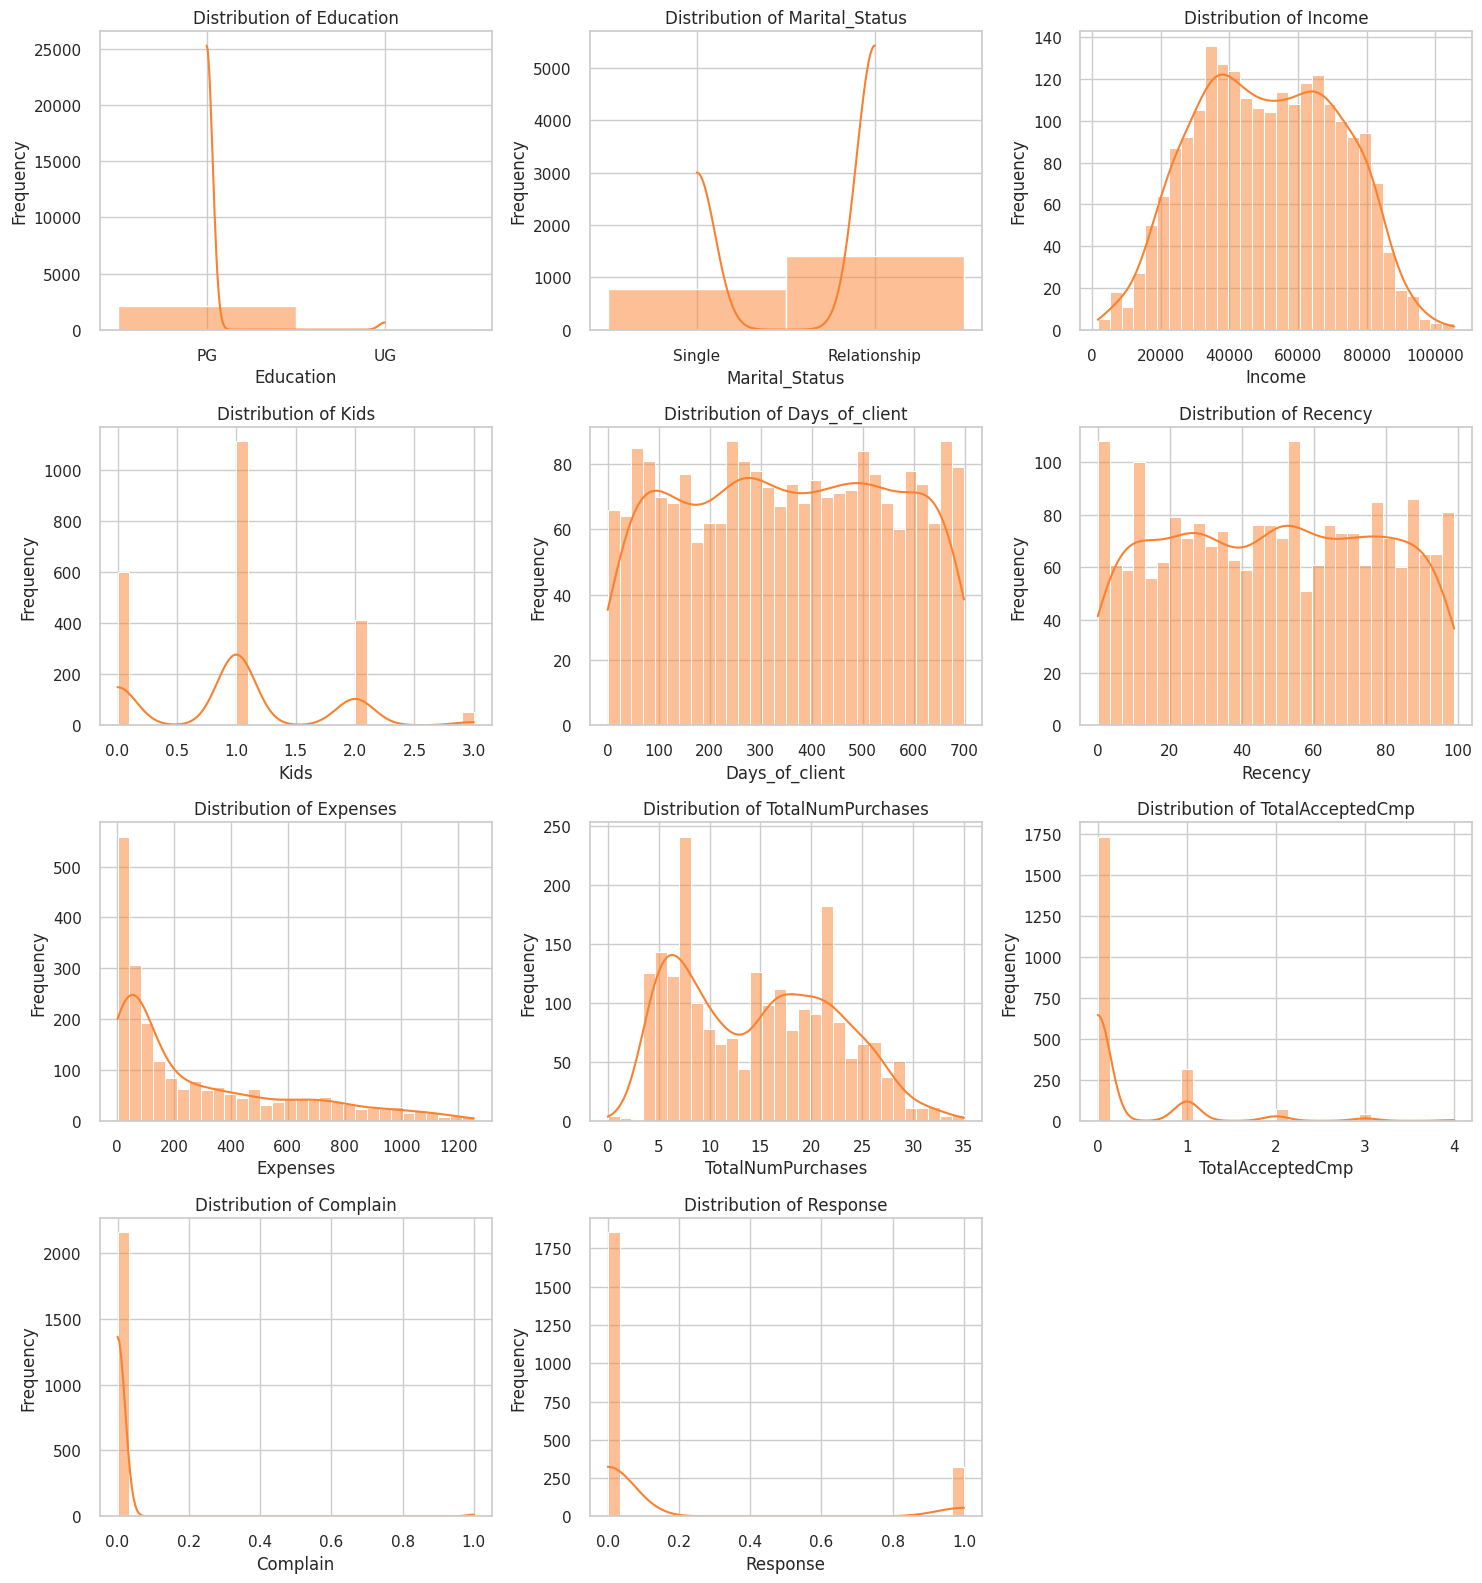

In [78]:
# Set the aesthetic style of the plots
sns.set(style='whitegrid')

# Define the color to be used for all plots
plot_color = '#FA812F'

# Buat gambar dengan subplot
num_cols = len(df_marketing.columns)
cols_per_row = 3
#sesuaikan dengan jumlah plot perbaris
num_rows = (num_cols // cols_per_row) + (num_cols % cols_per_row > 0)

fig, axes = plt.subplots(num_rows, cols_per_row, figsize=(15, num_rows * 4))

# Ratakan array sumbu untuk memudahkan pengindeksan
axes = axes.flatten()

# Ulangi melalui kolom dan buat distplot untuk setiap kolom
for i, column in enumerate(df_marketing.columns):
    sns.histplot(df_marketing[column], kde=True, ax=axes[i], color=plot_color, bins=30)
    axes[i].set_title(f'Distribution of {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frequency')


# Hapus subplot kosong jika jumlah kolom bukan kelipatan sempurna dari cols_per_row
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

# Conlusion Untuk Menentukan 2 pertanyaan bisnis proses yang relevant  :
1. Bagaimana kebiasaan pelanggan dalam berbelanja product pada perusahaan ini dapat memberikan insight yang dapat menjadi keuntungan bagi perusahaan ?

2. Bagaimana responsibilitas dari perusahaan dapat berpengaruh pada kebiasaan dari aktivitas pelanggan mungkin dalam hal pembelian, pengeluaran, dan penggunaan produk pada perusahaan tersebut?

# Jawaban
1. Jika dilihat dari graphic yang sudah dirangkum pada "Expenses, TotalNumPurchases, TotalAcceptedCmp" memang adanya terjadinya penurunan pada beberapa tahun terakhir, dalam hal ini mungkin juga dapat di pengaruhi oleh income dari masing-masing individu, akan tetapi jika kita bisa lihat dari induvidual seperti pada tingkat pendidikan dan status pernikahan pada beberapa individual tertentu mengalami tingkat kenaikan yang bisa dipertimbangkan.

misalnya seperti :
* Meningkatkan jumlah promosi pada suatu produk pada individu yang memiliki tingkat pendidikan yang tinggi atau keluarga yang mungkin banyak menghabiskan uangnya untuk banyak keperluan barang tertentu
* Memberikan pelayanan yang bagus, meningkatkan efektifitas belanja tidak hanya di store saja tapi juga online serta promosi yang menarik
* Menigkatkan campaign yang lebih baik agar tidak hanya campaign tertentu saja yang memiliki tingkat minat yang tinggi tapi bisa mencangkup semua campaign


2. Jika dilihat dari frequency Complain pada customer cenderung menurun atau bahkan tingkat complain yang rendah, ini mungkin bisa jadi dapat menimbulkan pertanyaan seperti apakah dari responsibilitas perusahaan kurang pada pelanggan, akan tetapi pada frequency response dapat kita lihat memang terjadi adanya penurunan yang signifikan akan tetapi dari frequency tersebut perusahaan sudah meningkatkan kembali responsibilitas nya terhadap pelanggan

Bagaimana pengaruhnya pada kebiasaan pelanggan, mungkin pertanyaan ini hampir sama jawabannya seperti pertanyaan nomor 1, akan tetapi dapat kita lihat dari frequency day_of_client dimana data tersebut diambil dari hitungan hari pelanggan-pelanggan tersebut gabung menjadi pelanggan perusahaan dan jika dilihat cenderung stabil dan tidak terjadi penurunan yang signifikan, lalu untuk recency (Pembaruan) selama pelanggan terakhir melakukan pembelian cenderung stabil dan tidak terjadi penurunan yang signifikan.

Dalam hal ini yang menjadi insight bagi perusahaan adalah meningkatkan responsibilitas terhadap pelanggan. bisa dalam bentuk promo yang menarik, campaign yang bagus, layanan online pada website agar mempermudah menjangkau semua kalangan

